In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
train = pd.read_csv("../input/nyc-taxi-trip-duration/train.zip")
test = pd.read_csv("../input/nyc-taxi-trip-duration/test.zip")

In [3]:
train.shape

(1458644, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [7]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [9]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  Year                1458644 non-null  int64         
 12  Month               1458644 non-null  int64         
 13  Date        

In [11]:
train.vendor_id.unique()

array([2, 1])

In [12]:
train.passenger_count.unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

Clean Data

In [13]:
train = train[(train.passenger_count > 0)]
train = train[(train.passenger_count <7 )]




In [14]:
train = train.drop('store_and_fwd_flag',axis=1)
test = test.drop('store_and_fwd_flag',axis=1)

EDA


Text(0, 0.5, 'Frequency')

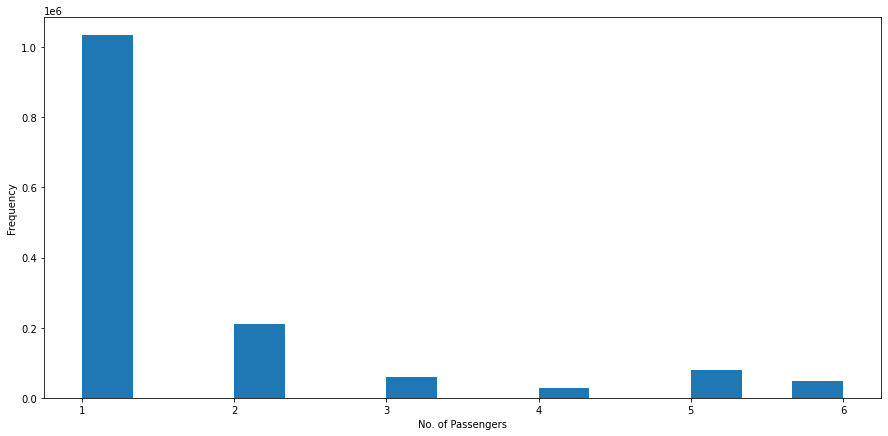

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'duration')

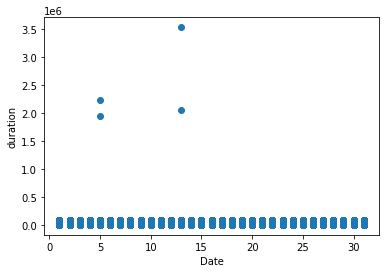

In [16]:
plt.figure()
plt.scatter(x=train['Date'], y=train['trip_duration'])
plt.xlabel('Date')
plt.ylabel('duration')

In [17]:
train['trip_duration'].describe()

count    1.458579e+06
mean     9.594638e+02
std      5.237073e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

Text(0, 0.5, 'duration')

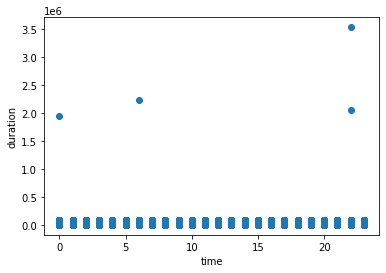

In [18]:
plt.figure()
plt.scatter(x=train['Hour'], y=train['trip_duration'])
plt.xlabel('time')
plt.ylabel('duration')

Text(0, 0.5, 'duration')

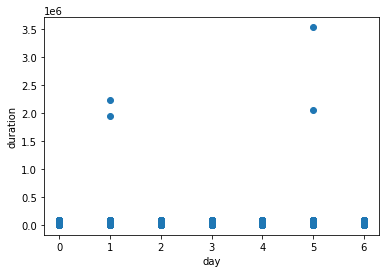

In [19]:
plt.figure()
plt.scatter(x=train['Day of Week'], y=train['trip_duration'])
plt.xlabel('day')
plt.ylabel('duration')

Model

In [20]:
x_train = train[["pickup_longitude", "pickup_latitude", "dropoff_longitude",
                 "dropoff_latitude","Month", "Day of Week", "Hour"]]
y_train = train['trip_duration']
x_test = test[["pickup_longitude", "pickup_latitude", "dropoff_longitude",
                 "dropoff_latitude","Month", "Day of Week", "Hour"]]

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458579 entries, 0 to 1458643
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   pickup_longitude   1458579 non-null  float64
 1   pickup_latitude    1458579 non-null  float64
 2   dropoff_longitude  1458579 non-null  float64
 3   dropoff_latitude   1458579 non-null  float64
 4   Month              1458579 non-null  int64  
 5   Day of Week        1458579 non-null  int64  
 6   Hour               1458579 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 89.0 MB


In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)

In [23]:
submission = pd.read_csv('../input/nyc-taxi-trip-duration/sample_submission.zip')
submission['trip_duration'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

,id,trip_duration
0,id3004672,759.82
1,id3505355,633.66
2,id1217141,516.18
3,id2150126,1158.25
4,id1598245,1295.67
5,id0668992,1087.87
6,id1765014,1337.23
7,id0898117,16219.41
8,id3905224,2635.67
9,id1543102,733.62
